In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Jupyter/perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.columns = ['Months','Sales']
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Months,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df1 = df.iloc[:-2,:103]
df1

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [6]:
df1['Months'] = pd.to_datetime(df1['Months'])
df1.set_index('Months',inplace=True)

In [7]:
df1.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [8]:
df1.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


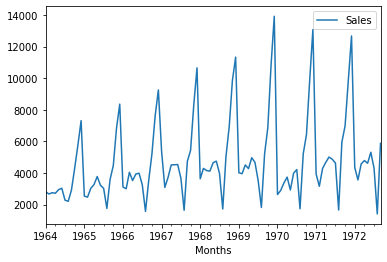

In [9]:
df1.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result = adfuller(df1['Sales'])

In [12]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("reject the null hypothesis. Data is stationary")
    else:
        print("H0 hypothesis,indicating it is non-stationary ")

In [13]:
adfuller_test(df1['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
H0 hypothesis,indicating it is non-stationary 


In [14]:
 df1['Seasonal Difference'] = df1['Sales'] - df1['Sales'].shift(12) 

In [15]:
df1.head(15)

,Sales,Seasonal Difference
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [16]:
adfuller_test( df1['Seasonal Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
reject the null hypothesis. Data is stationary


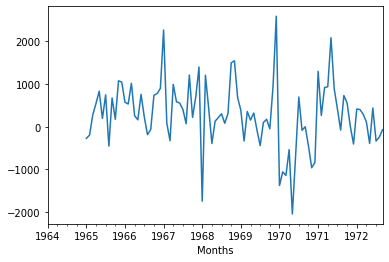

In [17]:
df1['Seasonal Difference'].plot()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

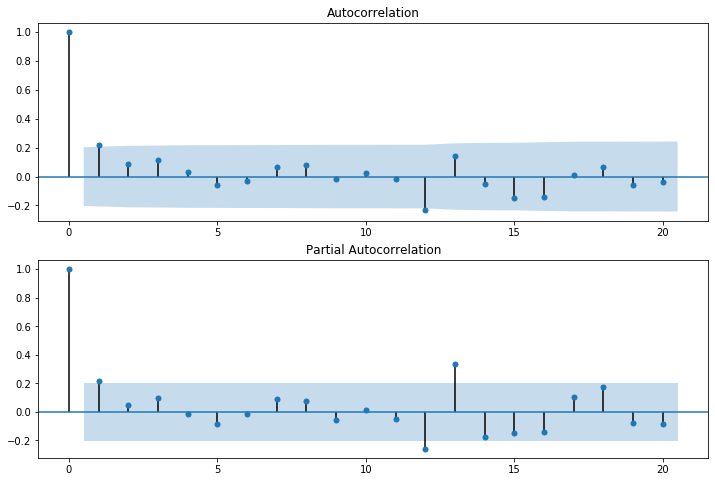

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Seasonal Difference'].dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Seasonal Difference'].dropna(),lags=20,ax=ax2)

# Autocorrelation and Partial Autocorrelation, usefulness of the graphs.
Identification of an AR model is often best done with the PACF.

For an AR model(which determines the value of P), the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

Three components(order) of ARIMA(for non-Seasonal Data):


p = the AR(Autoregressive)model lags.


d = the differencing/integrated value.


q = Moving Average lags.



# For Our Data we Need Another prediction model also called as Seasonal ARIMA(SARIMA):

Here in our example, from the above graphs it is clear that p=1, d=1 , q= 1 or 0(both results are almost same) , x= season_duration

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=sm.tsa.statespace.SARIMAX(df1['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


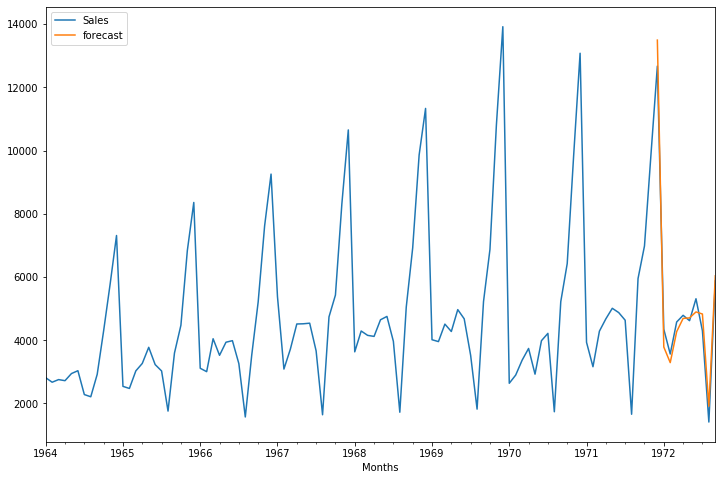

In [34]:
df1['forecast'] = results.predict(start= 95,end = 104,dynamic = True)
df1[['Sales','forecast']].plot(figsize=(12,8))

In [63]:
from pandas.tseries.offsets import DateOffset
future_dates = [df1.index[-1] +DateOffset(months = x) for x in range(0,24)]

In [64]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df1.columns)

In [65]:
future_dates_df.tail()

,Sales,Seasonal Difference,forecast
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN


In [66]:
future_df = pd.concat([df1,future_dates_df])
future_df

,Sales,Seasonal Difference,forecast
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
...,...,...,...
1974-04-01,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN


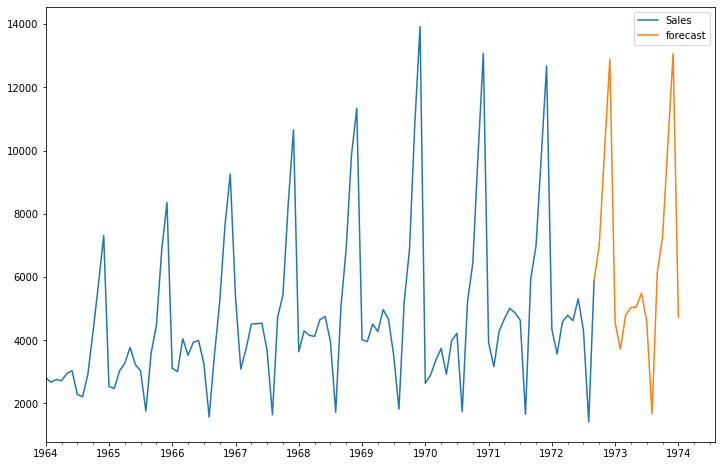

In [67]:
future_df['forecast'] = results.predict(start= 104,end = 120,dynamic = True)
future_df[['Sales','forecast']].plot(figsize=(12,8))